# Coursera Machine Learning

## Week 3 - (Regularized) Logistic Regression

**Kevin Rompala, Ph.D., cuds1212_AT_gmail.com**

*Last Updated: Friday, March 17, 2017*

## Part 1 - Logistic Regression

From the handout...

*Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant's probability of admission based on the scores from those two exams.*

In [1]:
%ls

Untitled.ipynb  ex2data1.txt    ex2data2.txt


The data for Part 1 is in the file ```ex2data1.txt```.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('./ex2data1.txt', header=None, names=['exam1','exam2','admit'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1    100 non-null float64
exam2    100 non-null float64
admit    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
data.head()

,exam1,exam2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


This is a clean dataset. The ```admit``` variable is `0` if the student was not offered admission and `1` if they were.

First we will visualize this two-dimensional dataset.

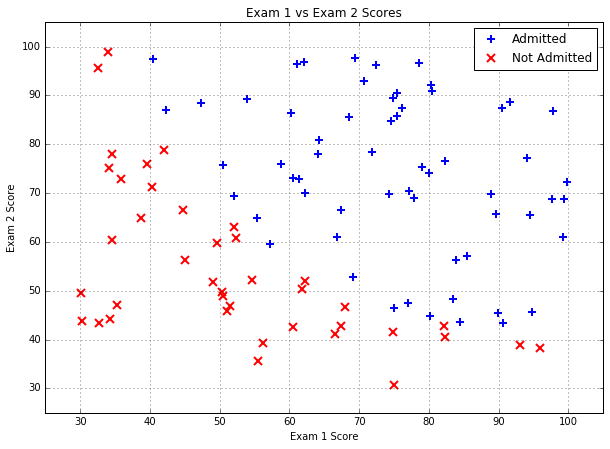

In [40]:
x_pos = data[data.admit==1].exam1.values
y_pos = data[data.admit==1].exam2.values
x_neg = data[data.admit==0].exam1.values
y_neg = data[data.admit==0].exam2.values

fit, ax = plt.subplots(figsize=(10,7))
ax.plot(x_pos,y_pos,'b+',Markersize=8,Markeredgewidth=2,label='Admitted')
ax.plot(x_neg,y_neg,'rx',Markersize=8,Markeredgewidth=2,label='Not Admitted')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_title('Exam 1 vs Exam 2 Scores')

ax.legend(numpoints=1)

ax.grid(True)
ax.set_xlim([25, 105])
ax.set_ylim([25, 105])

plt.show()

Now we will use our own gradient descent method to fit a logistic regression model to this data.

In [52]:
def sigmoid(x):
    """
    Computes the sigmoid function.
    
    x = Numpy array
    """
    
    #return 1 / (1+np.exp(x))
    return np.exp(-np.logaddexp(0, -x))

def computeCost(X, y, theta):
    """
    Computes the cost function used with logistic regression.
    
    X = m-by-n+1 NumPy array
    y = m-by-1 Numpy array
    theta = n+1-by-1 Numpy array
    """
    m = len(y)
    
    cost = -(1/m)*np.sum(y.T @ np.log(sigmoid(X @ theta)) + (1-y).T @ np.log(1-sigmoid(X @ theta)))
        
    return cost

Now let us test the ```computeCost``` function using default parameter values of ```0```.

In [270]:
x = data[['exam1','exam2']].values.reshape(-1,2)
y = data.admit.values.reshape(-1,1)

theta = np.array([[0],[0],[0]])

X = np.concatenate([np.ones([len(x),1]),x],axis=1)

defaultCost = computeCost(X,y,theta)

print('The default cost with parameters equal to zero is {}.'.format(defaultCost))

The default cost with parameters equal to zero is 0.6931471805599452.


To find optimal values for the parameters in our logistic regression model we will reuse our ```gradientDescent``` function from Week 2.

In [271]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Implements the gradient descent algrorithm for logistic regression.
    
    X = m-by-n+1 NumPy array
    y = m-by-1 Numpy array
    theta = n+1-by-1 Numpy array
    alpha = learning rate (float)
    num_iters = maximum number of iterations (int)
    """
    
    J_hist = np.zeros((num_iters+1,1))
    
    m = len(y)
    
    for i in range(num_iters):
        J_hist[i] = computeCost(X,y,theta)
        theta = theta - (alpha/m)*X.T @ (sigmoid(X @ theta) - y) # vectorized gradient descent

    J_hist[num_iters] = computeCost(X,y,theta)
        
    return [theta, J_hist]

In [272]:
theta_final, J_hist = gradientDescent(X,y,theta,0.0015,500000)

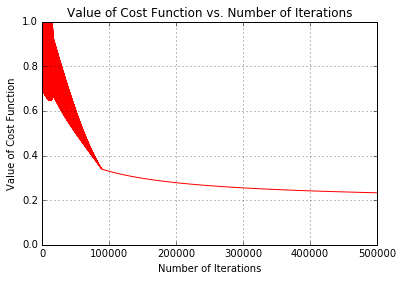

In [273]:
fig,ax = plt.subplots()

ax.plot(range(len(J_hist)),J_hist,'r')
ax.grid(True)
ax.set_xlim([0, 500000])
ax.set_ylim([0,1])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Value of Cost Function')
ax.set_title('Value of Cost Function vs. Number of Iterations')

In [274]:
print('The optimal parameter values are:\n')
for i in range(len(theta_final)):
    print('theta{}'.format(i) + ': ' + '{}'.format(float(theta_final[i])))

The optimal parameter values are:

theta0: -14.024578177281432
theta1: 0.11735112952755639
theta2: 0.11143969376973308


In [275]:
m = float(-theta_final[1]/theta_final[2])
b = float(-theta_final[0]/theta_final[2])

In [276]:
print(m)

-1.0530460517061189


In [277]:
print(b)

125.8490372942006


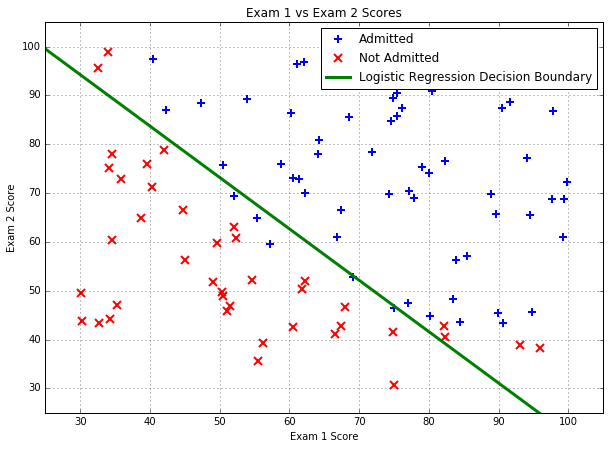

In [278]:
x_pos = data[data.admit==1].exam1.values
y_pos = data[data.admit==1].exam2.values
x_neg = data[data.admit==0].exam1.values
y_neg = data[data.admit==0].exam2.values

fit, ax = plt.subplots(figsize=(10,7))
ax.plot(x_pos,y_pos,'b+',Markersize=8,Markeredgewidth=2,label='Admitted')
ax.plot(x_neg,y_neg,'rx',Markersize=8,Markeredgewidth=2,label='Not Admitted')

t = np.linspace(0,100,1000)
ax.plot(t,m*t+b,'g',linewidth=3,label='Logistic Regression Decision Boundary')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_title('Exam 1 vs Exam 2 Scores')

ax.legend(numpoints=1)

ax.grid(True)
ax.set_xlim([25, 105])
ax.set_ylim([25, 105])

plt.show()

In [252]:
from sklearn.linear_model import LogisticRegression

x = data[['exam1','exam2']].values
y = data['admit'].values

log_reg = LogisticRegression(C=1000000,max_iter=1000)
log_reg.fit(x,y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [253]:
log_reg.coef_[0][0]

0.20458393546915277

In [254]:
log_reg.intercept_[0]

-24.955278335880667

In [255]:
m = (-log_reg.coef_[0][0]/log_reg.coef_[0][1])
b = (-log_reg.intercept_[0]/log_reg.coef_[0][1])

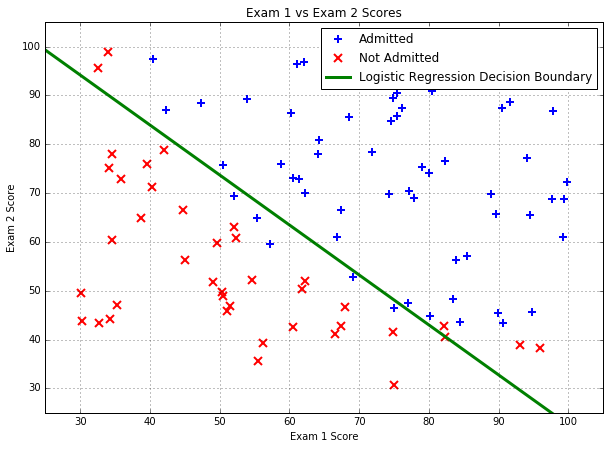

In [256]:
x_pos = data[data.admit==1].exam1.values
y_pos = data[data.admit==1].exam2.values
x_neg = data[data.admit==0].exam1.values
y_neg = data[data.admit==0].exam2.values

fit, ax = plt.subplots(figsize=(10,7))
ax.plot(x_pos,y_pos,'b+',Markersize=8,Markeredgewidth=2,label='Admitted')
ax.plot(x_neg,y_neg,'rx',Markersize=8,Markeredgewidth=2,label='Not Admitted')

t = np.linspace(0,100,1000)
ax.plot(t,m*t+b,'g',linewidth=3,label='Logistic Regression Decision Boundary')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_title('Exam 1 vs Exam 2 Scores')

ax.legend(numpoints=1)

ax.grid(True)
ax.set_xlim([25, 105])
ax.set_ylim([25, 105])

plt.show()

In [257]:
log_reg.predict_proba(np.array([[45,85]]))

array([[ 0.22542485,  0.77457515]])

In [206]:
theta_final[0]+theta_final[1]*45+theta_final[2]*85

array([ 0.63881964])

In [258]:
(log_reg.predict(x)==y).sum()/len(y)

0.89000000000000001

In [259]:
log_reg.score(x,y)

0.89000000000000001

In [260]:
log_reg.n_iter_

array([17], dtype=int32)